In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml


# classifiers
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# model evaluation & selection
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score, roc_curve, roc_auc_score






In [2]:
mnist = fetch_openml('mnist_784', as_frame= False)
X, y = mnist.data, mnist.target

print(X.shape)
print(y.shape)

/Users/xyw/opt/anaconda3/lib/python3.9/site-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


(70000, 784)
(70000,)


In [8]:
print(X_train[:5])
print(y_train[:5])

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
['5' '0' '4' '1' '9']


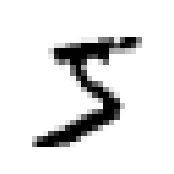

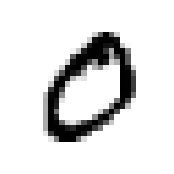

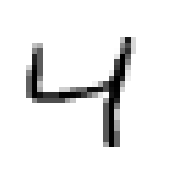

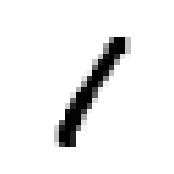

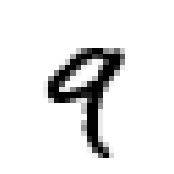

In [3]:
def plot_digit(image_data):
    image = image_data.reshape(28,28)
    plt.figure(figsize = (2,2))
    plt.imshow(image, cmap = 'binary')
    plt.axis('off')
 

some_digit = X[:5]
for img in some_digit:
    plot_digit(img)
    plt.show()

In [4]:
# Split traning and test sets

X_train, X_test, y_train, y_test = X[:6000], X[6000:], y[:6000], y[6000:]


In [52]:
# class distribution
labels = np.unique(y_train)
for label in labels:
    counts = sum(y_train == label)
    print("label: {}, precentage: {:.2f}".format(label, counts/len(y_train)))

label: 0, precentage: 0.10
label: 1, precentage: 0.11
label: 2, precentage: 0.10
label: 3, precentage: 0.10
label: 4, precentage: 0.10
label: 5, precentage: 0.09
label: 6, precentage: 0.10
label: 7, precentage: 0.11
label: 8, precentage: 0.09
label: 9, precentage: 0.10


# Multiclass classification

## OvR approach

logistic regression
decision tree
random forest
knn


 97% accuracy

In [ ]:
# Logitstic Regression

In [ ]:
# KNN

### Decision Tree

In [12]:
# Decision Tree


dt_clf = DecisionTreeClassifier(random_state = 42)
y_train_pred_dt = cross_val_predict(dt_clf, X_train, y_train, cv = 10)
# y_train_pred_dt[0]



'5'

In [23]:
precision_dt =  precision_score(y_train, y_train_pred_dt, average = 'weighted') # find average score by support
recall_dt = recall_score(y_train, y_train_pred_dt, average = 'weighted')

print(precision_dt, recall_dt)

0.7827477077108733 0.7843333333333333


In [ ]:
def macro_tpr_fpr_auc():
    n_classes = len(labels)
    fpr, tpr, roc_auc = dict{}, dict{}, dict()
    
    for i in range(n_classes):
        #need to modify
        #deftine y_onehot, y_score
        
        fpr[i], tpr[i], _ = roc_curve(y_onehot, y_score)
        roc_auc[i] = auc(fpr[i], tpr[i])
        
    fpr_grid = np.linspace(0.0, 1.0, 1000)
    
    mean_tpr = np.zeros_like(fpr_grid)
    for i in range(n_classes):
        mean_tpr += np.interp(fpr_grid, fpr[i], tpr[i])
        
    mean_tpr /= n_classes
    
    return fpr_grid, mean_tpr, auc(fpr_grid,mean_tpr)

In [55]:
# USE Macro ROC for model selection: 
    # Each class is evenly distributed in the dataset
    # False Positive and False Negative are equally important for this scenario.
    



ValueError: multiclass format is not supported

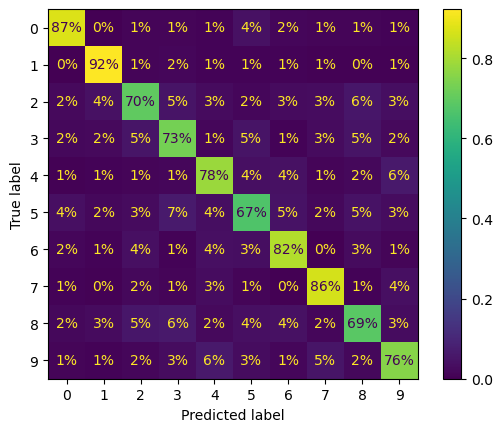

In [26]:
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred_dt, normalize='true', 
                                        values_format=".0%")


In [15]:

confusion_matrix(y_train, y_train_pred_dt)

array([[517,   1,   8,   7,   5,  25,   9,   8,   7,   5],
       [  0, 619,   9,  12,   7,   6,   7,   4,   3,   4],
       [ 14,  25, 406,  28,  15,   9,  15,  18,  32,  19],
       [ 13,  15,  32, 443,   9,  29,   6,  16,  30,  15],
       [  4,   6,   8,   9, 488,  23,  25,   8,  13,  39],
       [ 20,  11,  14,  34,  18, 343,  24,  10,  24,  16],
       [ 10,   5,  24,   5,  22,  20, 496,   2,  17,   7],
       [  5,   3,  14,   8,  20,   8,   2, 561,   6,  24],
       [ 11,  15,  30,  35,  12,  21,  23,   9, 379,  16],
       [  7,   5,  10,  18,  38,  18,   9,  31,  11, 454]])

### Random Forest